# **1 Introduction**

First we need to mount the drive and `cd` to the correct directory.

In [1]:
# Mount drive
from google.colab import drive; drive.mount('/content/drive')

# CD to current directory
%cd /content/drive/MyDrive/Colab Notebooks/Bachelor Thesis/Notebooks/Recurrent Neural Nets

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Bachelor Thesis/Notebooks/Recurrent Neural Nets


## **1.1 Other Relevant Information**

### **1.1.1 Return Sequence Argument**

Recurrent neural networks in Keras take `return_sequence` as an argument. This specifies whether or not every hidden state value is passed on to the next layer within the model, or if only the final hidden state is passed.

This variable determines whether or not we do sequence-to-sequence (Seq2Seq) modelling or sequence-to-one.

## **1.2 Feature Tensor & Label Vector (Seq2Seq)**

### **1.2.1 Feature tensor**

Consider the data table:

| `id` | `date` | $f^{(1)}$ | $f^{(2)}$ | $f^{(3)}$ |
|------|--------|-----------|-----------|-----------|
| 1    | 1      | 0         | 11        | 30        |
| 1    | 2      | 1         | 12        | 31        |
| 1    | 3      | 2         | 13        | 32        |
| 1    | 4      | 3         | 14        | 33        |
| 1    | 5      | 4         | 15        | 34        |
| 2    | 1      | 10        | 20        | 41        |
| 2    | 2      | 11        | 21        | 42        |
| 2    | 3      | 12        | 22        | 43        |
| 2    | 4      | 13        | 23        | 44        |
| 2    | 5      | 14        | 24        | 45        |


Data summary:
- 2 stocks.
- 5 dates each stock.
- 3 features each stock each day ($F=3$).
- Sorted by stock then by date.

We now define two metrics:
1. Length of sliding window ($T$)
2. Batch size ($B$)

We get the feature matricies (called samples) by running the sliding window over the data for each stock. Consider $T=3$. This yields the following samples:

**`ID` = 1:**

$
X_{1,1} = \begin{bmatrix}
0 & 11 & 30 \\
1 & 12 & 31 \\
2 & 13 & 32
\end{bmatrix}
$,
$
X_{1,2} = \begin{bmatrix}
1 & 12 & 31 \\
2 & 13 & 32 \\
3 & 14 & 33
\end{bmatrix}
$,
$
X_{1,3} = \begin{bmatrix}
2 & 13 & 32 \\
3 & 14 & 33 \\
4 & 15 & 34
\end{bmatrix}
$

**`ID` = 2:**

$
X_{2,1} = \begin{bmatrix}
10 & 20 & 41 \\
11 & 21 & 42 \\
12 & 22 & 43
\end{bmatrix}
$,
$
X_{2,2} = \begin{bmatrix}
11 & 21 & 42 \\
12 & 22 & 43 \\
13 & 23 & 44
\end{bmatrix}
$,
$
X_{2,3} = \begin{bmatrix}
12 & 22 & 43 \\
13 & 23 & 44 \\
14 & 24 & 45
\end{bmatrix}
$

where $X_{i,t}$ and $i$ is the stock index and $t$ sample number. We get a total of $N = 6$ samples.

The feature tensor is then created by *stacking* (for the lack of a better word) these matrices into a 3D tensor
$$
\mathbb{X} = \begin{bmatrix}
X_{1,1} \\
X_{1,2} \\
X_{1,3} \\
X_{2,1} \\
X_{2,2} \\
X_{2,3}
\end{bmatrix} \in \mathbb{R}^{N \times T \times F} = \mathbb{R}^{6 \times 3 \times 3}
$$

This is illustrated visually below:

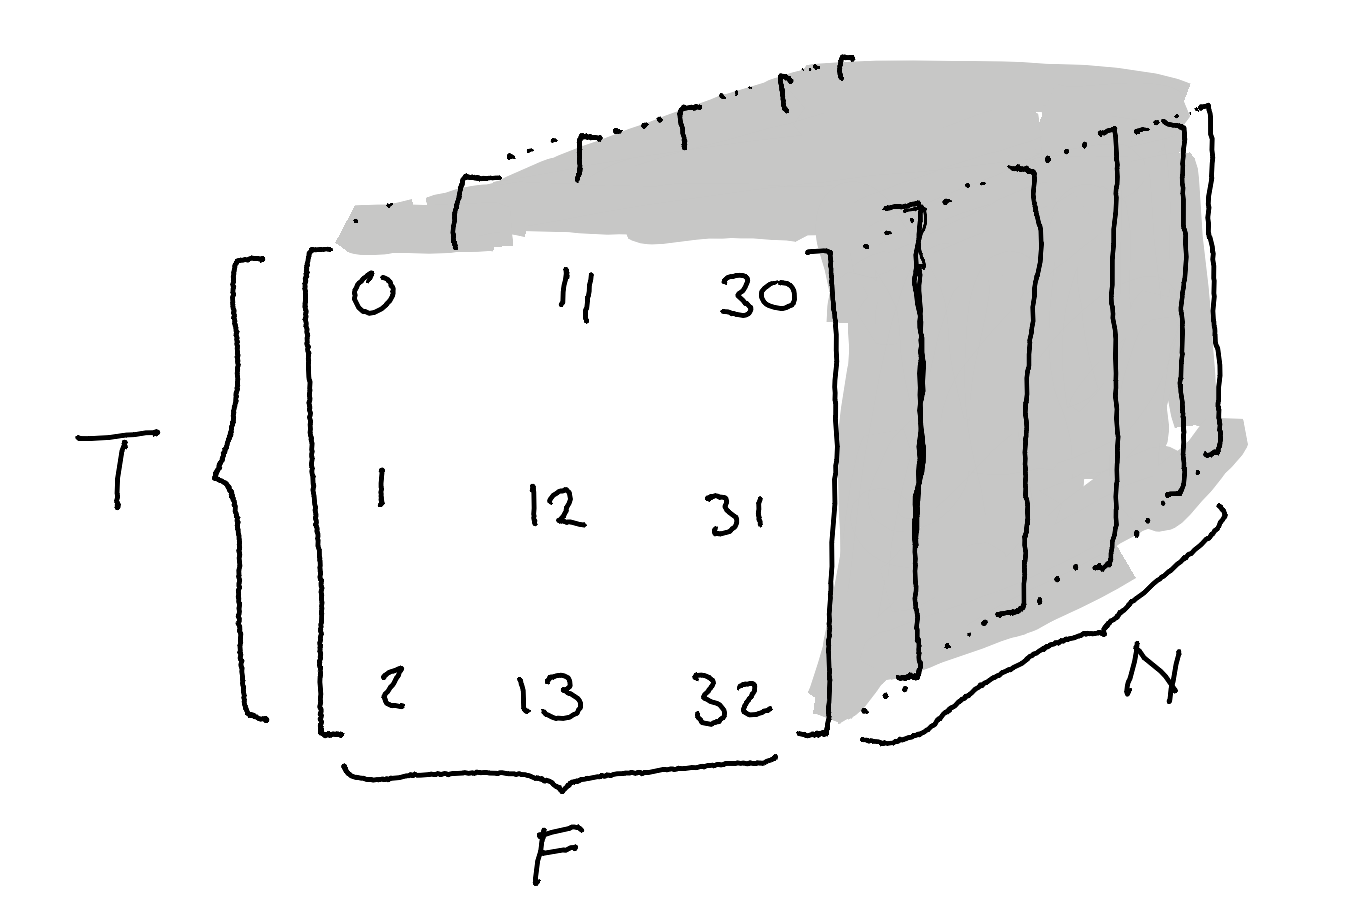

The batch size is how many of these layers/slices/samples we feed into the model at once. Illustration below shows what is feed into the model when batch size is 3 ($B=3$).

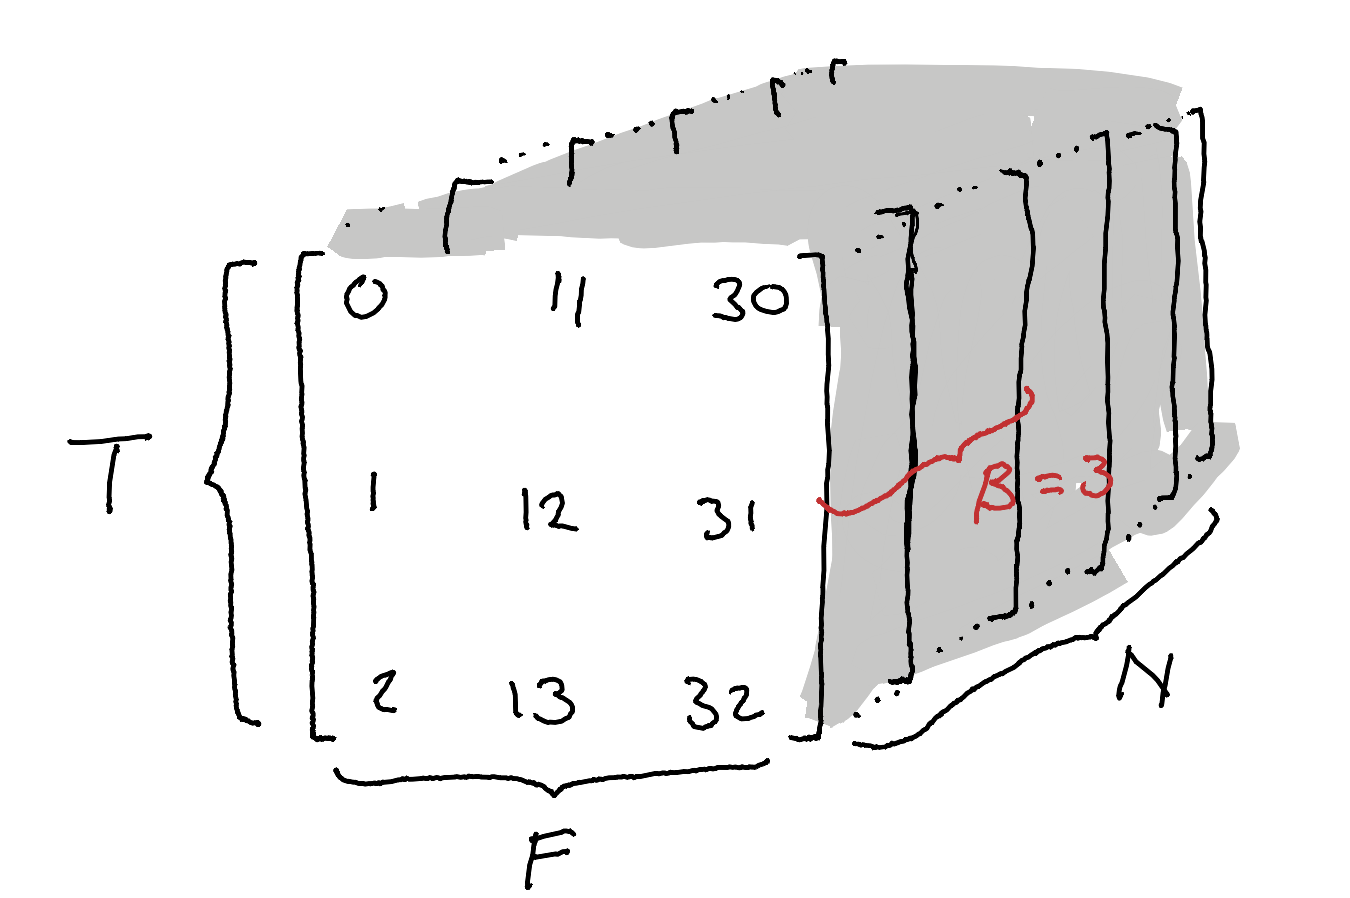

When coding this in python you use the following:  `reshape(data, (N, T, F))`

### **1.2.2 Label tensor**

Consider the data table:

| `id` | `date` | $f^{(1)}$ | $f^{(2)}$ | $f^{(3)}$ | `ret_exc_leadm1` |
|------|--------|-----------|-----------|-----------|------------------|
| 1    | 1      | 0         | 11        | 30        | 0.1               |
| 1    | 2      | 1         | 12        | 31        | 0.2               |
| 1    | 3      | 2         | 13        | 32        | 0.3               |
| 1    | 4      | 3         | 14        | 33        | -0.1              |
| 1    | 5      | 4         | 15        | 34        | 0.11              |
| 2    | 1      | 10        | 20        | 41        | -0.1              |
| 2    | 2      | 11        | 21        | 42        | 0.05              |
| 2    | 3      | 12        | 22        | 43        | 0.3               |
| 2    | 4      | 13        | 23        | 44        | 0.2               |
| 2    | 5      | 14        | 24        | 45        | 0.1               |


(Same as before but now with returns).

The returns are leading one month, so no need to lag them. Consider now again $T=3$. The sliding window generates the following sequences:


**`ID` = 1:**

$
y_{1,1} = \begin{bmatrix}
0.1 \\
0.2 \\
0.3
\end{bmatrix}
$,
$
y_{1,2} = \begin{bmatrix}
0.2  \\
0.3  \\
-0.1
\end{bmatrix}
$,
$
y_{1,3} = \begin{bmatrix}
0.3  \\
-0.1 \\
0.11
\end{bmatrix}
$,

**`ID` = 1:**

$
y_{2,1} = \begin{bmatrix}
-0.1 \\
0.05 \\
0.3  
\end{bmatrix}
$,
$
y_{2,2} = \begin{bmatrix}
0.05 \\
0.3  \\
0.2  
\end{bmatrix}
$,
$
y_{2,3} = \begin{bmatrix}
0.3 \\
0.2 \\
0.1
\end{bmatrix}
$

where $y_{i,t}$ and $i$ is the stock index and $t$ label sample number. We get a total of $N = 6$ label samples.

The label tensor is again created by *stacking* (for the lack of a better word) these matrices into a 3D tensor
$$
\mathbb{y} = \begin{bmatrix}
y_{1,1} \\
y_{1,2} \\
y_{1,3} \\
y_{2,1} \\
y_{2,2} \\
y_{2,3}
\end{bmatrix} \in \mathbb{R}^{N \times T \times 1} = \mathbb{R}^{6 \times 3 \times 1}
$$

This is how data is created for a sequence to sequence model setup.

Illustrated below.

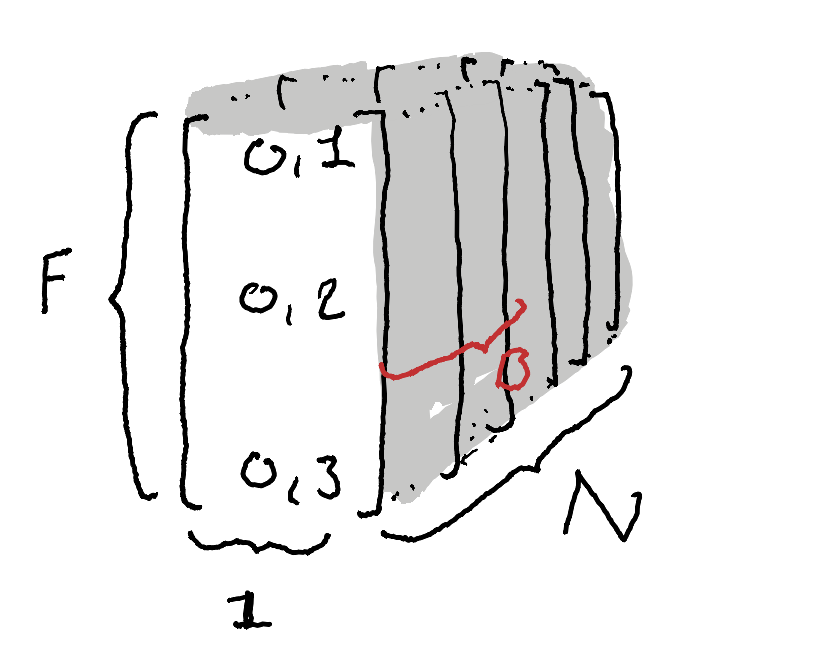

# **2 Imports**


In [2]:
# Packages
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import gc

# Optuna download
!pip install -q optuna==3.4.0
!pip install -q optuna-integration
import optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 kB 8.0 MB/s eta 0:00:00


The cleaned data is imported below.

In [3]:
# Load data and sort by eom
securities_data = pd.read_parquet('../Data/handoffs/data_stock_returns_final.parquet')
securities_data = securities_data.sort_values(by=['id', 'eom'])

# List of features and the label
features = [
    feat for feat in securities_data.columns
    if feat not in ['eom', 'id', 'ret_exc_lead1m']
]

label = 'ret_exc_lead1m'

# **3 Data Processer**

## **3.1 Tensor Builder**

In [10]:
def build_tensors(securities_data, features, label, window_len):
  """
  Takes dataframe as input, the features, and labels and returns a feature
  tensor of dimension (N, T, F) and a label tensor of dimension (N, T, 1)
  """

  # Ensure data is sorted correctly
  securities_data = securities_data.sort_values(by=['id', 'eom'])

  X_all, y_all = [], []

  for _, group in securities_data.groupby('id', sort=False):
      feats  = group[features].values
      labels = group[label].values.reshape(-1, 1)
      D = len(group)

      for start in range(D - window_len + 1):
          end = start + window_len
          X_all.append(feats[start:end])    # (T, F)
          y_all.append(labels[start:end])   # (T, 1)

  X = np.stack(X_all)  # (N, T, F)
  y = np.stack(y_all)  # (N, T, 1)

  del X_all, y_all, group, label, features
  gc.collect()
  return X, y

## **3.2 Test/Val/Train Split**

Like before, data needs to be split into train, test and validation data. A 70/15/15 split is used.

In [11]:
# Time-based split
months = sorted(securities_data['eom'].unique())
n      = len(months)
splits = [int(n * 0.7), int(n * 0.85)]

month_bins = [
    months[:splits[0]],             # Train
    months[splits[0]:splits[1]],    # Validation
    months[splits[1]:],             # Test
]


# securities_data[0]: train data
# securities_data[1]: validation data
# securities_data[2]: test data
securities_data = [
    securities_data[securities_data['eom'].isin(m)] for m in month_bins
]

In [ ]:
securities_data[2]['eom'].max()

Timestamp('2019-12-31 00:00:00')

Notice that the train, validation and test tensors are not created yet, since we are planning to search over sequence length. We therefore call the `build_tensors` function before training each model. An example call to this function could look like:


```
X_tensor, y_tensor = build_tensors(
    securities_data=securities_data[0],
    features=features,
    label=label,
    window_len=24)
```



# **4 Model Search**

Model search is conducted similar to before. We define a base model and let 5-6 parameters vary freely. We have the following parameters that can vary freely:
- Sequence length.
- Depth of network (amount of hidden recurrent layers).
- Units per layer (amount of units in each recurrent layer).
- Learning rate.
- Batch size.
- Optimizer (adam og sgd).
- L2 regulizer (bool and if True then rate).
- Dropout factor

All the models will use:
- SimpleRNN hidden layers with `tanh` activation functions.
- Last layer Dense(1) to get correct output shape.
- Layernormalization to stabilze training.
- Earlystopping callback to pervent overfitting.
- Gradient clipping to medigate probability of exploding gradients.


Like before, the TPE sampler with median pruning is used to sample intelligently and save compute.



## **4.1 First Search**

### **4.1.1 Functions**

In [ ]:
def create_model(trial: optuna.Trial, input_shape):
  n_units = trial.suggest_int('n_units', 5, 50, log=True)
  n_layers = trial.suggest_categorical('n_layers', [1, 2, 3, 4])
  bool_l2 = trial.suggest_categorical('bool_l2', [True, False])
  l2_fac = trial.suggest_float('l2_fac', 1e-4, 1e-2, log=True) if bool_l2 else None
  l2_reg = tf.keras.regularizers.L2(l2_fac) if bool_l2 else None
  dropout_fac = trial.suggest_float('dropout_fac', 0, 0.3)

  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Input(shape=input_shape))
  for _ in range(n_layers):
    model.add(tf.keras.layers.SimpleRNN(
        n_units,
        activation='tanh',
        kernel_regularizer=l2_reg,
        return_sequences=True,
        recurrent_dropout=dropout_fac,
        dropout=dropout_fac
      ))
    model.add(tf.keras.layers.LayerNormalization())

  model.add(tf.keras.layers.Dense(1, activation='linear', kernel_regularizer=l2_reg))
  return model

In [ ]:
def objective(trial: optuna.Trial):
  bs = trial.suggest_categorical('bs', [32, 64, 128, 256])
  lr = trial.suggest_float('lr', 1e-5, 1e-2, log=True)
  opt = trial.suggest_categorical('opt', ['adam', 'sgd'])
  seq_len = trial.suggest_categorical('seq_len', [6, 12, 24, 36])

  if opt == 'sgd':
    optimizer = tf.keras.optimizers.SGD(lr, clipnorm=1.0)
  if opt == 'adam':
    optimizer = tf.keras.optimizers.Adam(lr, clipnorm=1.0)

  # Get tensors
  X_train, y_train = build_tensors(securities_data=securities_data[0], features=features, label=label, window_len=seq_len)
  X_val, y_val = build_tensors(securities_data=securities_data[1], features=features, label=label, window_len=seq_len)

  # Get and compile model
  model = create_model(trial=trial, input_shape=X_train.shape[1:]) # Input_shape: T x F
  model.compile(optimizer=optimizer, loss='mse', metrics=['mse', 'mae'])

  # Callback
  earlystop_cb = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=1e-4,
    patience=5,
    restore_best_weights=True
  )
  pruning_cb = optuna.integration.KerasPruningCallback(trial, "val_loss")

  model.fit(
      X_train, y_train,
      validation_data=(X_val, y_val),
      epochs=30,
      batch_size=bs,
      callbacks=[pruning_cb, earlystop_cb],
      verbose=0
  )

  return model.evaluate(X_val, y_val, verbose=0)[0]

### **4.1.2 Study**

In [ ]:
sampler = optuna.samplers.TPESampler(seed=42)
pruner = optuna.pruners.MedianPruner(
    n_startup_trials=10,
    n_warmup_steps=3,
    interval_steps=1,
)

first_search = optuna.create_study(
    direction='minimize',
    study_name='first_search',
    sampler=sampler,
    pruner=pruner,
    storage='sqlite:///models studies/first_search.db',
    load_if_exists=True
)

first_search.optimize(objective, n_trials=60)

[I 2025-05-11 12:22:04,838] A new study created in RDB with name: first_search
[I 2025-05-11 12:23:25,081] Trial 0 finished with value: 0.009793855249881744 and parameters: {'bs': 64, 'lr': 2.9380279387035334e-05, 'opt': 'adam', 'seq_len': 6, 'n_units': 47, 'n_layers': 1, 'bool_l2': False, 'dropout_fac': 0.12958350559263473}. Best is trial 0 with value: 0.009793855249881744.
[I 2025-05-11 12:33:54,782] Trial 1 finished with value: 0.025345487520098686 and parameters: {'bs': 64, 'lr': 0.00012562773503807024, 'opt': 'sgd', 'seq_len': 24, 'n_units': 20, 'n_layers': 4, 'bool_l2': True, 'l2_fac': 0.0001567993391672301, 'dropout_fac': 0.20526990795364705}. Best is trial 0 with value: 0.009793855249881744.
[I 2025-05-11 12:37:48,983] Trial 2 finished with value: 0.03592425584793091 and parameters: {'bs': 128, 'lr': 0.00534516611064682, 'opt': 'sgd', 'seq_len': 24, 'n_units': 47, 'n_layers': 2, 'bool_l2': True, 'l2_fac': 0.0002465844721448739, 'dropout_fac': 0.01356818667316142}. Best is trial

In [ ]:
# Load study
first_search = optuna.load_study(
    study_name='first_search',
    storage='sqlite:///models studies/first_search.db'
)

### **4.1.3 Parameter Frequency**

  Variables:

  n_units = trial.suggest_int('n_units', 5, 50, log=True)
  
  n_layers = trial.suggest_categorical('n_layers', [1, 2, 3, 4])
  
  bool_l2 = trial.suggest_categorical('bool_l2', [True, False])
  
  l2_fac = trial.suggest_float('l2_fac', 1e-4, 1e-2, log=True) if bool_l2 else None
  
  l2_reg = tf.keras.regularizers.L2(l2_fac) if bool_l2 else None
  
  dropout_fac = trial.suggest_float('dropout_fac', 0, 0.3)


  bs = trial.suggest_categorical('bs', [32, 64, 128, 256])

  lr = trial.suggest_float('lr', 1e-5, 1e-2, log=True)
  
  opt = trial.suggest_categorical('opt', ['adam', 'sgd'])
  
  seq_len = trial.suggest_categorical('seq_len', [6, 12, 24, 36])

In [ ]:
first_search_df = first_search.trials_dataframe().sort_values(by='value')
first_search_df = first_search_df[first_search_df['state'] == 'COMPLETE']
first_search_df.head(int(len(first_search_df)*.2))

,number,value,datetime_start,datetime_complete,duration,params_bool_l2,params_bs,params_dropout_fac,params_l2_fac,params_lr,params_n_layers,params_n_units,params_opt,params_seq_len,state
14,14,0.009499,2025-05-11 13:00:58.039237,2025-05-11 13:03:21.557121,0 days 00:02:23.517884,False,64,0.187019,NaN,0.003277,3,12,adam,36,COMPLETE
25,25,0.009510,2025-05-11 13:22:21.278162,2025-05-11 13:23:36.621112,0 days 00:01:15.342950,False,64,0.156936,NaN,0.004582,1,7,adam,36,COMPLETE
33,33,0.009511,2025-05-11 13:31:05.412990,2025-05-11 13:32:28.897365,0 days 00:01:23.484375,False,64,0.200340,NaN,0.004179,1,8,adam,36,COMPLETE
42,42,0.009511,2025-05-11 13:42:40.186688,2025-05-11 13:43:57.057002,0 days 00:01:16.870314,False,64,0.299382,NaN,0.004238,1,7,adam,36,COMPLETE
7,7,0.009513,2025-05-11 12:50:55.806324,2025-05-11 12:52:00.583463,0 days 00:01:04.777139,False,256,0.295695,NaN,0.007715,3,15,sgd,36,COMPLETE
21,21,0.009513,2025-05-11 13:14:56.307023,2025-05-11 13:16:13.492963,0 days 00:01:17.185940,False,64,0.148156,NaN,0.004518,1,7,adam,36,COMPLETE
39,39,0.009516,2025-05-11 13:38:38.821771,2025-05-11 13:39:29.634206,0 days 00:00:50.812435,False,128,0.259805,NaN,0.001471,1,13,adam,36,COMPLETE
6,6,0.009516,2025-05-11 12:49:40.817557,2025-05-11 12:50:55.771777,0 days 00:01:14.954220,False,64,0.096961,NaN,0.004878,1,5,adam,36,COMPLETE


All models use sequence length of 36, so we freeze this.

## **4.2 Second Search**

### **4.2.1 Functions**

Since sequence length is frozen we do not need to call the `build_tensors` function before every training. We therefore just call it once and build the appropiate tensors once.

In [12]:
# Builds tensors with sliding window of 36
X_train, y_train = build_tensors(securities_data=securities_data[0], features=features, label=label, window_len=36)
X_val, y_val = build_tensors(securities_data=securities_data[1], features=features, label=label, window_len=36)

In [ ]:
def create_model(trial: optuna.Trial, input_shape):
  n_units = trial.suggest_int('n_units', 5, 50, log=True)
  n_layers = trial.suggest_categorical('n_layers', [1, 2, 3, 4])
  bool_l2 = trial.suggest_categorical('bool_l2', [True, False])
  l2_fac = trial.suggest_float('l2_fac', 1e-4, 1e-2, log=True) if bool_l2 else None
  l2_reg = tf.keras.regularizers.L2(l2_fac) if bool_l2 else None
  dropout_fac = trial.suggest_float('dropout_fac', 0, 0.3)

  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Input(shape=input_shape))
  for _ in range(n_layers):
    model.add(tf.keras.layers.SimpleRNN(
        n_units,
        activation='tanh',
        kernel_regularizer=l2_reg,
        return_sequences=True,
        recurrent_dropout=dropout_fac,
        dropout=dropout_fac
      ))
    model.add(tf.keras.layers.LayerNormalization())

  model.add(tf.keras.layers.Dense(1, activation='linear', kernel_regularizer=l2_reg))
  return model

In [ ]:
def objective(trial: optuna.Trial):
  bs = trial.suggest_categorical('bs', [32, 64, 128, 256])
  lr = trial.suggest_float('lr', 1e-5, 1e-2, log=True)
  opt = trial.suggest_categorical('opt', ['adam', 'sgd'])

  if opt == 'sgd':
    optimizer = tf.keras.optimizers.SGD(lr, clipnorm=1.0)
  if opt == 'adam':
    optimizer = tf.keras.optimizers.Adam(lr, clipnorm=1.0)

  # Get and compile model
  model = create_model(trial=trial, input_shape=X_train.shape[1:]) # Input_shape: T x F
  model.compile(optimizer=optimizer, loss='mse', metrics=['mse', 'mae'])

  # Callback
  earlystop_cb = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=1e-4,
    patience=5,
    restore_best_weights=True
  )
  pruning_cb = optuna.integration.KerasPruningCallback(trial, "val_loss")

  model.fit(
      X_train, y_train,
      validation_data=(X_val, y_val),
      epochs=30,
      batch_size=bs,
      callbacks=[pruning_cb, earlystop_cb],
      verbose=0
  )

  return model.evaluate(X_val, y_val, verbose=0)[0]

### **4.2.2 Study**

To encurage the sampler to sample less exploitatively we increase the amount of random searches conducted and

In [ ]:
sampler = optuna.samplers.TPESampler(seed=42, n_startup_trials=20, n_ei_candidates=48)
pruner = optuna.pruners.MedianPruner(
    n_startup_trials=10,
    n_warmup_steps=3,
    interval_steps=1,
)

second_search = optuna.create_study(
    direction='minimize',
    study_name='second_search',
    sampler=sampler,
    pruner=pruner,
    storage='sqlite:///models studies/second_search.db',
    load_if_exists=True
)

second_search.optimize(objective, n_trials=60)

[I 2025-05-11 14:11:55,095] A new study created in RDB with name: second_search
[I 2025-05-11 14:22:38,767] Trial 0 finished with value: 0.010192640125751495 and parameters: {'bs': 64, 'lr': 2.9380279387035334e-05, 'opt': 'adam', 'n_units': 37, 'n_layers': 4, 'bool_l2': True, 'l2_fac': 0.0002310201887845295, 'dropout_fac': 0.055021352956030146}. Best is trial 0 with value: 0.010192640125751495.
[I 2025-05-11 14:30:13,002] Trial 1 finished with value: 0.051714394241571426 and parameters: {'bs': 64, 'lr': 0.000684792009557478, 'opt': 'sgd', 'n_units': 11, 'n_layers': 2, 'bool_l2': True, 'l2_fac': 0.0016409286730647919, 'dropout_fac': 0.051157237106187456}. Best is trial 0 with value: 0.010192640125751495.
[I 2025-05-11 14:37:05,362] Trial 2 finished with value: 0.01036736462265253 and parameters: {'bs': 128, 'lr': 8.200518402245828e-05, 'opt': 'sgd', 'n_units': 13, 'n_layers': 4, 'bool_l2': False, 'dropout_fac': 0.09351332282682329}. Best is trial 0 with value: 0.010192640125751495.
[I 2

In [ ]:
# Load study
second_search = optuna.load_study(
    study_name='second_search',
    storage='sqlite:///models studies/second_search.db'
)

### **4.2.3 Parameter Frequency**

Variables:

  n_units = trial.suggest_int('n_units', 5, 50, log=True)

  n_layers = trial.suggest_categorical('n_layers', [1, 2, 3, 4])
  
  bool_l2 = trial.suggest_categorical('bool_l2', [True, False])
  
  l2_fac = trial.suggest_float('l2_fac', 1e-4, 1e-2, log=True) if bool_l2 else
  None

l2_reg = tf.keras.regularizers.L2(l2_fac) if bool_l2 else None

  dropout_fac = trial.suggest_float('dropout_fac', 0, 0.3)

  bs = trial.suggest_categorical('bs', [32, 64, 128, 256])

   lr = trial.suggest_float('lr', 1e-5, 1e-2, log=True)
  
  opt = trial.suggest_categorical('opt', ['adam', 'sgd'])

In [ ]:
second_search_df = second_search.trials_dataframe().sort_values(by='value')
second_search_df = second_search_df[second_search_df['state'] == 'COMPLETE']
second_search_df.head(int(len(second_search_df)*.2))

,number,value,datetime_start,datetime_complete,duration,params_bool_l2,params_bs,params_dropout_fac,params_l2_fac,params_lr,params_n_layers,params_n_units,params_opt,state
7,7,0.009506,2025-05-11 14:56:30.008707,2025-05-11 14:58:31.218357,0 days 00:02:01.209650,False,128,0.095401,NaN,0.006153,3,37,adam,COMPLETE
51,51,0.009512,2025-05-11 16:22:20.218321,2025-05-11 16:24:10.204864,0 days 00:01:49.986543,False,128,0.085529,NaN,0.002041,4,24,adam,COMPLETE
37,37,0.009513,2025-05-11 16:01:37.887852,2025-05-11 16:02:53.223064,0 days 00:01:15.335212,False,256,0.134786,NaN,0.004162,4,24,adam,COMPLETE
8,8,0.009516,2025-05-11 14:58:31.253166,2025-05-11 15:00:17.152992,0 days 00:01:45.899826,False,256,0.210906,NaN,0.003821,4,12,sgd,COMPLETE
27,27,0.009517,2025-05-11 15:48:03.185048,2025-05-11 15:49:35.623460,0 days 00:01:32.438412,False,128,0.089894,NaN,0.004489,3,14,adam,COMPLETE
39,39,0.009519,2025-05-11 16:03:51.249395,2025-05-11 16:05:11.691189,0 days 00:01:20.441794,False,256,0.165525,NaN,0.006354,4,50,adam,COMPLETE
25,25,0.009519,2025-05-11 15:45:30.370865,2025-05-11 15:47:02.448081,0 days 00:01:32.077216,False,128,0.091255,NaN,0.002102,3,16,adam,COMPLETE
35,35,0.009520,2025-05-11 15:59:19.266617,2025-05-11 16:00:36.595635,0 days 00:01:17.329018,False,256,0.100643,NaN,0.001461,4,18,adam,COMPLETE
46,46,0.009520,2025-05-11 16:12:53.546753,2025-05-11 16:14:41.439582,0 days 00:01:47.892829,False,256,0.174614,NaN,0.005230,4,43,sgd,COMPLETE


None of the top models use L2 regularization, so we drop this.

## **4.3 Third Study**

### **4.3.1 Functions**

In [ ]:
def create_model(trial: optuna.Trial, input_shape):
  n_units = trial.suggest_int('n_units', 5, 50, log=True)
  n_layers = trial.suggest_categorical('n_layers', [1, 2, 3, 4])
  dropout_fac = trial.suggest_float('dropout_fac', 0, 0.3)

  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Input(shape=input_shape))
  for _ in range(n_layers):
    model.add(tf.keras.layers.SimpleRNN(
        n_units,
        activation='tanh',
        return_sequences=True,
        recurrent_dropout=dropout_fac,
        dropout=dropout_fac
      ))
    model.add(tf.keras.layers.LayerNormalization())

  model.add(tf.keras.layers.Dense(1, activation='linear'))
  return model

In [ ]:
def objective(trial: optuna.Trial):
  bs = trial.suggest_categorical('bs', [32, 64, 128, 256])
  lr = trial.suggest_float('lr', 1e-5, 1e-2, log=True)
  opt = trial.suggest_categorical('opt', ['adam', 'sgd'])

  if opt == 'sgd':
    optimizer = tf.keras.optimizers.SGD(lr, clipnorm=1.0)
  if opt == 'adam':
    optimizer = tf.keras.optimizers.Adam(lr, clipnorm=1.0)

  # Get and compile model
  model = create_model(trial=trial, input_shape=X_train.shape[1:]) # Input_shape: T x F
  model.compile(optimizer=optimizer, loss='mse', metrics=['mse', 'mae'])

  # Callback
  earlystop_cb = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=1e-4,
    patience=5,
    restore_best_weights=True
  )
  pruning_cb = optuna.integration.KerasPruningCallback(trial, "val_loss")

  model.fit(
      X_train, y_train,
      validation_data=(X_val, y_val),
      epochs=30,
      batch_size=bs,
      callbacks=[pruning_cb, earlystop_cb],
      verbose=0
  )

  return model.evaluate(X_val, y_val, verbose=0)[0]

### **4.3.2 Study**

To encurage the sampler to sample less exploitatively we increase the amount of random searches conducted and

In [ ]:
sampler = optuna.samplers.TPESampler(seed=42, n_startup_trials=20, n_ei_candidates=48)
pruner = optuna.pruners.MedianPruner(
    n_startup_trials=10,
    n_warmup_steps=3,
    interval_steps=1,
)

third_search = optuna.create_study(
    direction='minimize',
    study_name='third_search',
    sampler=sampler,
    pruner=pruner,
    storage='sqlite:///models studies/third_search.db',
    load_if_exists=True
)

third_search.optimize(objective, n_trials=60)

[I 2025-05-11 17:02:08,142] Using an existing study with name 'third_search' instead of creating a new one.
[I 2025-05-11 17:06:20,705] Trial 1 finished with value: 0.009541778825223446 and parameters: {'bs': 64, 'lr': 2.9380279387035334e-05, 'opt': 'adam', 'n_units': 37, 'n_layers': 4, 'dropout_fac': 0.2497327922401265}. Best is trial 1 with value: 0.009541778825223446.
[I 2025-05-11 17:08:05,516] Trial 2 finished with value: 0.009594853967428207 and parameters: {'bs': 256, 'lr': 0.00037520558551242813, 'opt': 'adam', 'n_units': 20, 'n_layers': 4, 'dropout_fac': 0.23555278841790406}. Best is trial 1 with value: 0.009541778825223446.
[I 2025-05-11 17:08:52,747] Trial 3 finished with value: 0.009537926875054836 and parameters: {'bs': 128, 'lr': 0.0006647135865318024, 'opt': 'adam', 'n_units': 45, 'n_layers': 1, 'dropout_fac': 0.20526990795364705}. Best is trial 3 with value: 0.009537926875054836.
[I 2025-05-11 17:11:16,726] Trial 4 finished with value: 0.009552555158734322 and parameter

In [ ]:
# Load study
third_search = optuna.load_study(
    study_name='third_search',
    storage='sqlite:///models studies/third_search.db'
)

### **4.3.3 Parameter Frequency**

Variables

  n_units = trial.suggest_int('n_units', 5, 50, log=True)

  n_layers = trial.suggest_categorical('n_layers', [1, 2, 3, 4])

  dropout_fac = trial.suggest_float('dropout_fac', 0, 0.3)


  bs = trial.suggest_categorical('bs', [32, 64, 128, 256])

  lr = trial.suggest_float('lr', 1e-5, 1e-2, log=True)
  
  opt = trial.suggest_categorical('opt', ['adam', 'sgd'])

In [ ]:
# Accidentally added test trials (trial 60 and above)
third_search_df = third_search.trials_dataframe().drop(columns=['datetime_start', 'datetime_complete', 'duration']).sort_values(by='value')
third_search_df = third_search_df[third_search_df['state'] == 'COMPLETE']
third_search_df.head(int(len(third_search_df)*.2))

,number,value,params_bs,params_dropout_fac,params_lr,params_n_layers,params_n_units,params_opt,state
8,8,0.009485,256,0.152571,0.000303,3,5,adam,COMPLETE
40,40,0.009511,128,0.228367,0.007514,3,12,adam,COMPLETE
42,42,0.009514,128,0.242804,0.005758,3,14,adam,COMPLETE
43,43,0.009515,128,0.243997,0.006218,3,15,adam,COMPLETE
16,16,0.009515,128,0.199051,0.002186,1,7,adam,COMPLETE
59,59,0.009515,128,0.280607,0.005131,1,10,adam,COMPLETE
44,44,0.009517,128,0.227609,0.006704,3,15,adam,COMPLETE
39,39,0.009517,128,0.250370,0.004369,3,11,adam,COMPLETE


All the models use `adam` optimizer, so this parameter is frozen.

## **4.4 Fourth Search**

### **4.4.1 Functions**

In [ ]:
def create_model(trial: optuna.Trial, input_shape):
  n_units = trial.suggest_int('n_units', 5, 50, log=True)
  n_layers = trial.suggest_categorical('n_layers', [1, 2, 3, 4])
  dropout_fac = trial.suggest_float('dropout_fac', 0, 0.3)

  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Input(shape=input_shape))
  for _ in range(n_layers):
    model.add(tf.keras.layers.SimpleRNN(
        n_units,
        activation='tanh',
        return_sequences=True,
        recurrent_dropout=dropout_fac,
        dropout=dropout_fac
      ))
    model.add(tf.keras.layers.LayerNormalization())

  model.add(tf.keras.layers.Dense(1, activation='linear'))
  return model

In [ ]:
def objective(trial: optuna.Trial):
  bs = trial.suggest_categorical('bs', [32, 64, 128, 256])
  lr = trial.suggest_float('lr', 1e-5, 1e-2, log=True)

  # Get and compile model
  model = create_model(trial=trial, input_shape=X_train.shape[1:]) # Input_shape: T x F
  model.compile(optimizer=tf.keras.optimizers.Adam(lr, clipnorm=1.0), loss='mse', metrics=['mse', 'mae'])

  # Callback
  earlystop_cb = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=1e-4,
    patience=5,
    restore_best_weights=True
  )
  pruning_cb = optuna.integration.KerasPruningCallback(trial, "val_loss")

  model.fit(
      X_train, y_train,
      validation_data=(X_val, y_val),
      epochs=30,
      batch_size=bs,
      callbacks=[pruning_cb, earlystop_cb],
      verbose=0
  )

  return model.evaluate(X_val, y_val, verbose=0)[0]

### **4.4.2 Study**

In [ ]:
sampler = optuna.samplers.TPESampler(seed=42, n_startup_trials=20, n_ei_candidates=48)
pruner = optuna.pruners.MedianPruner(
    n_startup_trials=10,
    n_warmup_steps=3,
    interval_steps=1,
)


fourth_search = optuna.create_study(
    direction='minimize',
    study_name='fourth_search',
    sampler=sampler,
    pruner=pruner,
    storage='sqlite:///models studies/fourth_search.db',
    load_if_exists=True
)

fourth_search.optimize(objective, n_trials=60)

[I 2025-05-11 21:36:14,328] A new study created in RDB with name: fourth_search
[I 2025-05-11 21:39:07,274] Trial 0 finished with value: 0.009550298564136028 and parameters: {'bs': 64, 'lr': 2.9380279387035334e-05, 'n_units': 7, 'n_layers': 2, 'dropout_fac': 0.006175348288740734}. Best is trial 0 with value: 0.009550298564136028.
[I 2025-05-11 21:48:25,844] Trial 1 finished with value: 0.009533334523439407 and parameters: {'bs': 32, 'lr': 3.5498788321965036e-05, 'n_units': 9, 'n_layers': 4, 'dropout_fac': 0.04184815819561255}. Best is trial 1 with value: 0.009533334523439407.
[I 2025-05-11 21:50:09,757] Trial 2 finished with value: 0.00966582540422678 and parameters: {'bs': 256, 'lr': 3.972110727381908e-05, 'n_units': 16, 'n_layers': 3, 'dropout_fac': 0.019515477895583853}. Best is trial 1 with value: 0.009533334523439407.
[I 2025-05-11 21:53:30,262] Trial 3 finished with value: 0.009612657129764557 and parameters: {'bs': 64, 'lr': 1.9634341572933304e-05, 'n_units': 24, 'n_layers': 3, 

In [ ]:
# Load study
fourth_search = optuna.load_study(
    study_name='fourth_search',
    storage='sqlite:///models studies/fourth_search.db'
)

### **4.4.3 Parameter Frequency**

Variables:

  n_units = trial.suggest_int('n_units', 5, 50, log=True)

  n_layers = trial.suggest_categorical('n_layers', [1, 2, 3, 4])

  dropout_fac = trial.suggest_float('dropout_fac', 0, 0.3)

  bs = trial.suggest_categorical('bs', [32, 64, 128, 256])

  lr = trial.suggest_float('lr', 1e-5, 1e-2, log=True)

In [ ]:
# Accidentally added test trials (trial 60 and above)
fourth_search_df = fourth_search.trials_dataframe().drop(columns=['datetime_start', 'datetime_complete', 'duration']).sort_values(by='value')
fourth_search_df = fourth_search_df[fourth_search_df['state'] == 'COMPLETE']
fourth_search_df.head(int(len(fourth_search_df)*.2))

,number,value,params_bs,params_dropout_fac,params_lr,params_n_layers,params_n_units,state
23,23,0.009496,128,0.108435,0.000173,4,50,COMPLETE
29,29,0.009498,64,0.119151,0.000171,4,20,COMPLETE
38,38,0.009498,256,0.221880,0.000120,4,15,COMPLETE
7,7,0.009502,256,0.191267,0.000741,4,10,COMPLETE
26,26,0.009511,128,0.202750,0.000065,4,30,COMPLETE
33,33,0.009512,64,0.132080,0.000232,4,21,COMPLETE


## **4.5 Fifth Search**

### **4.5.1 Functions**

In [ ]:
def create_model(trial: optuna.Trial, input_shape):
  n_units = trial.suggest_int('n_units', 5, 50, log=True)
  dropout_fac = trial.suggest_float('dropout_fac', 0, 0.3)

  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Input(shape=input_shape))
  for _ in range(4):
    model.add(tf.keras.layers.SimpleRNN(
        n_units,
        activation='tanh',
        return_sequences=True,
        recurrent_dropout=dropout_fac,
        dropout=dropout_fac
      ))
    model.add(tf.keras.layers.LayerNormalization())

  model.add(tf.keras.layers.Dense(1, activation='linear'))
  return model

In [ ]:
def objective(trial: optuna.Trial):
  bs = trial.suggest_categorical('bs', [32, 64, 128, 256])
  lr = trial.suggest_float('lr', 1e-5, 1e-2, log=True)

  # Get and compile model
  model = create_model(trial=trial, input_shape=X_train.shape[1:]) # Input_shape: T x F
  model.compile(optimizer=tf.keras.optimizers.Adam(lr, clipnorm=1.0), loss='mse', metrics=['mse', 'mae'])

  # Callback
  earlystop_cb = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=1e-4,
    patience=5,
    restore_best_weights=True
  )
  pruning_cb = optuna.integration.KerasPruningCallback(trial, "val_loss")

  model.fit(
      X_train, y_train,
      validation_data=(X_val, y_val),
      epochs=30,
      batch_size=bs,
      callbacks=[pruning_cb, earlystop_cb],
      verbose=0
  )

  return model.evaluate(X_val, y_val, verbose=0)[0]

### **4.5.2 Study**

In [ ]:
sampler = optuna.samplers.TPESampler(seed=42, n_startup_trials=20, n_ei_candidates=48)
pruner = optuna.pruners.MedianPruner(
    n_startup_trials=10,
    n_warmup_steps=3,
    interval_steps=1,
)


fifth_search = optuna.create_study(
    direction='minimize',
    study_name='fifth_search',
    sampler=sampler,
    pruner=pruner,
    storage='sqlite:///models studies/fifth_search.db',
    load_if_exists=True
)

fifth_search.optimize(objective, n_trials=60)

[I 2025-05-12 07:38:05,905] A new study created in RDB with name: fifth_search
[I 2025-05-12 07:43:57,590] Trial 0 finished with value: 0.009539209306240082 and parameters: {'bs': 64, 'lr': 2.9380279387035334e-05, 'n_units': 7, 'dropout_fac': 0.017425083650459836}. Best is trial 0 with value: 0.009539209306240082.
[I 2025-05-12 07:49:27,670] Trial 1 finished with value: 0.009511294774711132 and parameters: {'bs': 32, 'lr': 0.008123245085588688, 'n_units': 34, 'dropout_fac': 0.06370173320348284}. Best is trial 1 with value: 0.009511294774711132.
[I 2025-05-12 07:50:59,708] Trial 2 finished with value: 0.009540049359202385 and parameters: {'bs': 256, 'lr': 0.00019762189340280086, 'n_units': 9, 'dropout_fac': 0.18355586841671384}. Best is trial 1 with value: 0.009511294774711132.
[I 2025-05-12 07:52:37,693] Trial 3 finished with value: 0.009519478306174278 and parameters: {'bs': 256, 'lr': 0.0022673986523780395, 'n_units': 7, 'dropout_fac': 0.15427033152408348}. Best is trial 1 with value

In [ ]:
# Load study
fifth_search = optuna.load_study(
    study_name='fifth_search',
    storage='sqlite:///models studies/fifth_search.db'
)

### **4.5.3 Parameter Frequency**

Variables:

  n_units = trial.suggest_int('n_units', 5, 50, log=True)
  
  dropout_fac = trial.suggest_float('dropout_fac', 0, 0.3)

  bs = trial.suggest_categorical('bs', [32, 64, 128, 256])

  lr = trial.suggest_float('lr', 1e-5, 1e-2, log=True)

In [ ]:
# Accidentally added test trials (trial 60 and above)
fifth_search_df = fifth_search.trials_dataframe().drop(columns=['datetime_start', 'datetime_complete', 'duration']).sort_values(by='value')
fifth_search_df = fifth_search_df[fifth_search_df['state'] == 'COMPLETE']
fifth_search_df.head(int(len(fifth_search_df)*.2))

,number,value,params_bs,params_dropout_fac,params_lr,params_n_units,state
33,33,0.009488,32,0.179779,0.000170,14,COMPLETE
18,18,0.009499,64,0.035960,0.000179,8,COMPLETE
39,39,0.009499,32,0.135201,0.000062,15,COMPLETE
41,41,0.009501,32,0.147760,0.000062,18,COMPLETE
28,28,0.009502,32,0.099807,0.000010,18,COMPLETE
52,52,0.009503,32,0.132693,0.000069,14,COMPLETE
6,6,0.009508,64,0.164013,0.000086,16,COMPLETE


We see no very apparent patterns. Whilst batch size 32 dominates this space, we hesitate to freeze it due to its interaction with learning rate. The final search is therefore conducted.

## **4.6 Final Search**

### **4.6.1 Functions**

In [ ]:
def create_model(trial: optuna.Trial, input_shape):
  n_units = trial.suggest_int('n_units', 5, 50, log=True)
  dropout_fac = trial.suggest_float('dropout_fac', 0, 0.3)

  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Input(shape=input_shape))
  for _ in range(4):
    model.add(tf.keras.layers.SimpleRNN(
        n_units,
        activation='tanh',
        return_sequences=True,
        recurrent_dropout=dropout_fac,
        dropout=dropout_fac
      ))
    model.add(tf.keras.layers.LayerNormalization())

  model.add(tf.keras.layers.Dense(1, activation='linear'))
  return model

In [ ]:
def objective(trial: optuna.Trial):
  bs = trial.suggest_categorical('bs', [32, 64, 128, 256])
  lr = trial.suggest_float('lr', 1e-5, 1e-2, log=True)

  # Get and compile model
  model = create_model(trial=trial, input_shape=X_train.shape[1:]) # Input_shape: T x F
  model.compile(optimizer=tf.keras.optimizers.Adam(lr, clipnorm=1.0), loss='mse', metrics=['mse', 'mae'])

  # Callback
  earlystop_cb = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=1e-4,
    patience=5,
    restore_best_weights=True
  )
  pruning_cb = optuna.integration.KerasPruningCallback(trial, "val_loss")

  model.fit(
      X_train, y_train,
      validation_data=(X_val, y_val),
      epochs=30,
      batch_size=bs,
      callbacks=[pruning_cb, earlystop_cb],
      verbose=0
  )

  return model.evaluate(X_val, y_val, verbose=0)[0]

### **4.6.2 Study**

In [ ]:
sampler = optuna.samplers.TPESampler(seed=42, n_startup_trials=20, n_ei_candidates=48)
pruner = optuna.pruners.MedianPruner(
    n_startup_trials=20,
    n_warmup_steps=6,
    interval_steps=1,
)


final_search = optuna.create_study(
    direction='minimize',
    study_name='final_search',
    sampler=sampler,
    pruner=pruner,
    storage='sqlite:///models studies/final_search.db',
    load_if_exists=True
)

final_search.optimize(objective, n_trials=100)

[I 2025-05-12 12:47:11,650] A new study created in RDB with name: final_search
[I 2025-05-12 12:51:08,502] Trial 0 finished with value: 0.00954939890652895 and parameters: {'bs': 64, 'lr': 2.9380279387035334e-05, 'n_units': 7, 'dropout_fac': 0.017425083650459836}. Best is trial 0 with value: 0.00954939890652895.
[I 2025-05-12 12:58:35,306] Trial 1 finished with value: 0.009599973447620869 and parameters: {'bs': 32, 'lr': 0.008123245085588688, 'n_units': 34, 'dropout_fac': 0.06370173320348284}. Best is trial 0 with value: 0.00954939890652895.
[I 2025-05-12 13:00:28,213] Trial 2 finished with value: 0.009642751887440681 and parameters: {'bs': 256, 'lr': 0.00019762189340280086, 'n_units': 9, 'dropout_fac': 0.18355586841671384}. Best is trial 0 with value: 0.00954939890652895.
[I 2025-05-12 13:01:56,201] Trial 3 finished with value: 0.009572327136993408 and parameters: {'bs': 256, 'lr': 0.0022673986523780395, 'n_units': 7, 'dropout_fac': 0.15427033152408348}. Best is trial 0 with value: 0.

In [6]:
# Load study
final_search = optuna.load_study(
    study_name='final_search',
    storage='sqlite:///models studies/final_search.db'
)

Parameters:

  n_units = trial.suggest_int('n_units', 5, 50, log=True)

  dropout_fac = trial.suggest_float('dropout_fac', 0, 0.3)

bs = trial.suggest_categorical('bs', [32, 64, 128, 256])

  lr = trial.suggest_float('lr', 1e-5, 1e-2, log=True)

In [ ]:
# Accidentally added test trials (trial 60 and above)
final_search_df = final_search.trials_dataframe().drop(columns=['datetime_start', 'datetime_complete', 'duration']).sort_values(by='value')
final_search_df = final_search_df[final_search_df['state'] == 'COMPLETE']
final_search_df.head(int(len(final_search_df)*.2))

,number,value,params_bs,params_dropout_fac,params_lr,params_n_units,state
98,98,0.009484,32,0.165621,0.000192,9,COMPLETE
5,5,0.009485,32,0.148553,0.000209,6,COMPLETE
81,81,0.009486,32,0.159561,0.000168,15,COMPLETE
58,58,0.009487,64,0.144412,0.000209,19,COMPLETE
97,97,0.009488,32,0.161828,0.000195,11,COMPLETE
29,29,0.009489,64,0.148135,0.000380,12,COMPLETE
6,6,0.009490,64,0.164013,0.000086,16,COMPLETE
71,71,0.009490,32,0.163385,0.000197,14,COMPLETE
64,64,0.009490,128,0.132890,0.000070,17,COMPLETE
27,27,0.009492,32,0.189523,0.000056,13,COMPLETE


# **5 Final Model**

We now train the final model. This model is based on the best model found in the final search. The final model is trained in order to get relevant training metrics.

## **5.1 Training the Final Model**

In [7]:
best_params = final_search.best_params
best_params

{'bs': 32,
 'lr': 0.00019228138922141027,
 'n_units': 9,
 'dropout_fac': 0.16562087589236485}

Below the final best model is built and compiled.

In [13]:
rnn_final = tf.keras.Sequential([

    # Input layer
    tf.keras.layers.Input(shape=X_train.shape[1:]),

    # 1'st hidden layer
    tf.keras.layers.SimpleRNN( best_params['n_units'], activation='tanh', return_sequences=True, recurrent_dropout=best_params['dropout_fac'], dropout=best_params['dropout_fac']),
    tf.keras.layers.LayerNormalization(),

    # 2'nd hidden layer
    tf.keras.layers.SimpleRNN( best_params['n_units'], activation='tanh', return_sequences=True, recurrent_dropout=best_params['dropout_fac'], dropout=best_params['dropout_fac']),
    tf.keras.layers.LayerNormalization(),

    # 3'rd hidden layer
    tf.keras.layers.SimpleRNN( best_params['n_units'], activation='tanh', return_sequences=True, recurrent_dropout=best_params['dropout_fac'], dropout=best_params['dropout_fac']),
    tf.keras.layers.LayerNormalization(),

    # 4'th hidden layer
    tf.keras.layers.SimpleRNN( best_params['n_units'], activation='tanh', return_sequences=True, recurrent_dropout=best_params['dropout_fac'], dropout=best_params['dropout_fac']),
    tf.keras.layers.LayerNormalization(),

    # Output layer
    tf.keras.layers.Dense(1, activation='linear')
])

rnn_final.compile(
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=best_params['lr']
    ),
    loss='mse',
    metrics=['mse', 'mae']
)

In [14]:
# Create early stopping callback
earlystop_cb = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=1e-5,
    patience=10,
    restore_best_weights=True
)

# Train model
rnn_final_history = rnn_final.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=final_search.best_params['bs'],
    epochs=60,
    callbacks=[earlystop_cb],
    verbose=1
)

Epoch 1/60
3899/3899 ━━━━━━━━━━━━━━━━━━━━ 66s 14ms/step - loss: 0.3093 - mae: 0.3372 - mse: 0.3093 - val_loss: 0.0097 - val_mae: 0.0688 - val_mse: 0.0097
Epoch 2/60
3899/3899 ━━━━━━━━━━━━━━━━━━━━ 50s 13ms/step - loss: 0.0191 - mae: 0.0916 - mse: 0.0191 - val_loss: 0.0095 - val_mae: 0.0678 - val_mse: 0.0095
Epoch 3/60
3899/3899 ━━━━━━━━━━━━━━━━━━━━ 49s 13ms/step - loss: 0.0173 - mae: 0.0867 - mse: 0.0173 - val_loss: 0.0095 - val_mae: 0.0679 - val_mse: 0.0095
Epoch 4/60
3899/3899 ━━━━━━━━━━━━━━━━━━━━ 51s 13ms/step - loss: 0.0170 - mae: 0.0860 - mse: 0.0170 - val_loss: 0.0095 - val_mae: 0.0676 - val_mse: 0.0095
Epoch 5/60
3899/3899 ━━━━━━━━━━━━━━━━━━━━ 51s 13ms/step - loss: 0.0170 - mae: 0.0855 - mse: 0.0170 - val_loss: 0.0095 - val_mae: 0.0677 - val_mse: 0.0095
Epoch 6/60
3899/3899 ━━━━━━━━━━━━━━━━━━━━ 50s 13ms/step - loss: 0.0169 - mae: 0.0856 - mse: 0.0169 - val_loss: 0.0095 - val_mae: 0.0677 - val_mse: 0.0095
Epoch 7/60
3899/3899 ━━━━━━━━━━━━━━━━━━━━ 50s 13ms/step - loss: 0.0170 - mae

Finally the best model is trained with early stopping to avoid overfitting.

We save the model for future evaluation

In [ ]:
# Save model
# rnn_final.save('models studies/final_model_rnn.keras')

# Load model
rnn_final = tf.keras.models.load_model('models studies/final_model_rnn.keras')

# Load and save sub 49 val loss model
#rnn_final.save('models studies/final_model_rnn_sub49.keras')
# rnn_final = tf.keras.models.load_model('models studies/final_model_rnn_sub49.keras')

## **5.2 Evaluate Final Model**

Before we test the model we load the relevant data:

In [15]:
X_train, y_train = build_tensors(securities_data=securities_data[0], features=features, label=label, window_len=36)
X_val, y_val = build_tensors(securities_data=securities_data[1], features=features, label=label, window_len=36)
X_test, y_test = build_tensors(securities_data=securities_data[2], features=features, label=label, window_len=36)

### **5.2.1 Training History**

In [16]:
plt.rcdefaults()
plt.rcParams.update({
    'mathtext.fontset': 'cm',
    'font.family': 'STIXGeneral',
    "figure.dpi": 100
})

def plot_metrics_side_by_side(history_dict,
                              metrics=('loss', 'mae', 'mse'),
                              figsize=(12, 4),
                              out=None):
    n = len(metrics)
    fig, axes = plt.subplots(1, n, figsize=figsize, sharex=True)


    if n == 1:
        axes = [axes]

    for ax, metric in zip(axes, metrics):
        epochs = range(1, len(history_dict[metric]) + 1)

        # Training curve
        ax.plot(epochs, history_dict[metric], label="Training", color="black", linewidth=1)

        # Validation curve (if it exists)
        val_metric = f"val_{metric}"
        if val_metric in history_dict:
            ax.plot(epochs, history_dict[val_metric], linestyle="-.", color="black", linewidth=1,
                    label="Validation")

        # Cosmetics for each subplot
        ax.set_title(f"{metric.upper()} over Epochs")
        ax.set_xlabel("Epoch")
        ax.set_ylabel(metric.upper())
        ax.legend()

    fig.tight_layout()

    if out:
        fig.savefig(out, bbox_inches="tight")

    plt.show()

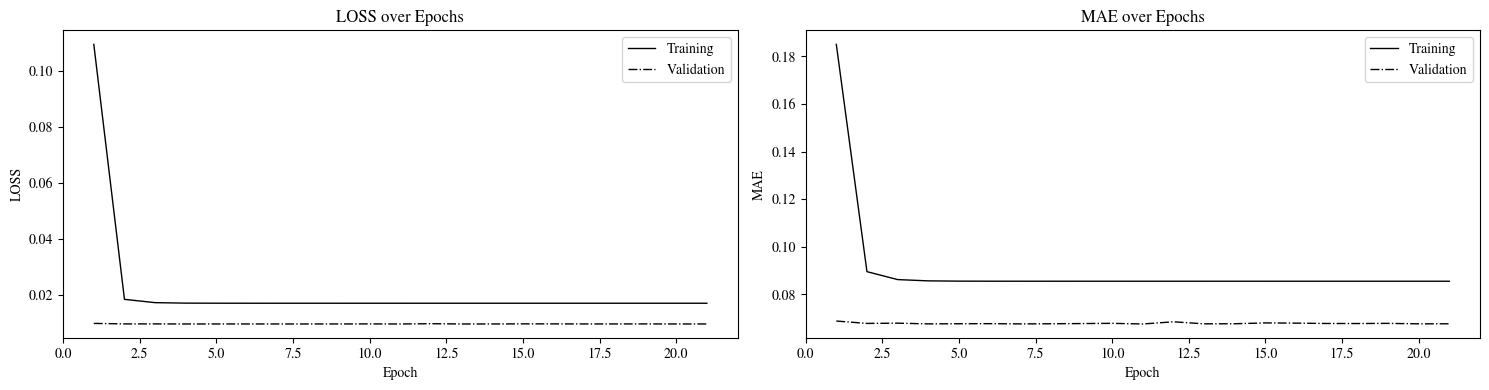

In [17]:
plot_metrics_side_by_side(rnn_final_history.history, metrics=['loss', 'mae'], figsize=(15, 4))

### **5.2.2 Regression Tasks**

We now evaluate how well the model performs out of sample. We test it in the validation and test data to see how it performs.

In [18]:
validation_evaluation = rnn_final.evaluate(X_val, y_val, batch_size=64, verbose=0)
test_evaluation = rnn_final.evaluate(X_test, y_test, batch_size=64, verbose=0)

print(f"{'Validation evaluation:':40s} {validation_evaluation}")
print(f"{'Test evaluation:':40s} {test_evaluation}")

Validation evaluation:                   [0.009515981189906597, 0.009515979327261448, 0.06758204102516174]
Test evaluation:                         [0.010761389508843422, 0.010761389508843422, 0.07159256190061569]


In [ ]:
#Validation evaluation:                   [0.009515325538814068, 0.009515325538814068, 0.0676417127251625]
#Test evaluation:                         [0.010778562165796757, 0.010778561234474182, 0.07166866958141327]

In [19]:
predict_val_rnn = rnn_final.predict(X_val, batch_size=64, verbose=0)
directional_acc_val_rnn = np.mean(np.multiply(predict_val_rnn, y_val) > 0)

predict_test_rnn = rnn_final.predict(X_test, batch_size=64, verbose=0)
directional_acc_test_rnn = np.mean(np.multiply(predict_test_rnn, y_test) > 0)

print(f"{'Directional accuracy validation data:':40s} {directional_acc_val_rnn:.7f}")
print(f"{'Directional accuracy test data:':40s} {directional_acc_test_rnn:.7f}")
print(f"{'Directional accuracy difference:':40s} {(directional_acc_test_rnn - directional_acc_val_rnn):.7f}")

Directional accuracy validation data:    0.5375207
Directional accuracy test data:          0.5379353
Directional accuracy difference:         0.0004146


### **5.2.3 Classification Tasks**

If we turn the task into predicting up/down movements in stocks we get following classification based performance metrics.

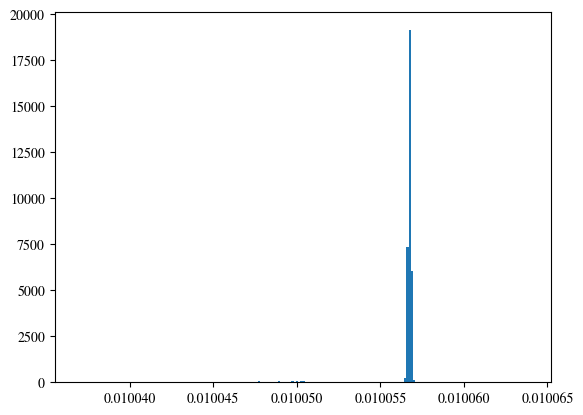

In [20]:
test = predict_val_rnn.flatten()
test = test[test<0.02]

plt.hist(test, bins=200)
plt.show()

In [ ]:
correct_direction = (np.multiply(predict_test_rnn, y_test) > 0).astype(int)
weights = np.abs(y_test)
hit_ratio_by_magnitude = np.sum(correct_direction * weights) / np.sum(weights)
print(f"Hit Ratio by Magnitude: {hit_ratio_by_magnitude:.4f}")

Hit Ratio by Magnitude: 0.5424


In [ ]:
print("Positive y_train ratio:", np.mean(y_train > 0))

Positive y_train ratio: 0.5412304749079522
